In [2]:
import pandas as pd

# Assuming file is called 'DSBI_dataset.csv'
df = pd.read_csv("DSBI_dataset.csv")

df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Profitable
0,1,09-01-2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",0
1,2,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",1
2,3,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",1
3,4,02-01-2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",0
4,5,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",0


In [ ]:
# Fix column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace(r'[^\w]', '', regex=True)

# Drop irrelevant column
df.drop(columns=['Sr_No'], inplace=True)

# Convert 'Amount_in_USD' to numeric
df['Amount_in_USD'] = df['Amount_in_USD'].str.replace(',', '')
df['Amount_in_USD'] = pd.to_numeric(df['Amount_in_USD'], errors='coerce')

# Handle missing values
df['City__Location'] = df['City__Location'].fillna("Unknown")
df['Industry_Vertical'] = df['Industry_Vertical'].fillna("Other")
df = df.dropna(subset=['Amount_in_USD', 'Investors_Name'])

# Convert 'Date_ddmmyyyy' to datetime
df['Date_ddmmyyyy'] = pd.to_datetime(df['Date_ddmmyyyy'], dayfirst=True, errors='coerce')

# Standardize text columns
text_cols = ['Startup_Name', 'Industry_Vertical', 'City__Location', 'Investors_Name']
for col in text_cols:
    df[col] = df[col].str.title().str.strip()

# Preview cleaned data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2045 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_ddmmyyyy      2039 non-null   datetime64[ns]
 1   Startup_Name       2045 non-null   object        
 2   Industry_Vertical  2045 non-null   object        
 3   SubVertical        1403 non-null   object        
 4   City__Location     2045 non-null   object        
 5   Investors_Name     2045 non-null   object        
 6   InvestmentnType    2042 non-null   object        
 7   Amount_in_USD      2045 non-null   float64       
 8   Profitable         2045 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 159.8+ KB


,Date_ddmmyyyy,Startup_Name,Industry_Vertical,SubVertical,City__Location,Investors_Name,InvestmentnType,Amount_in_USD,Profitable
0,2020-01-09,Byju’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,0
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,1
2,2020-01-09,Mamaearth,E-Commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,1
3,2020-01-02,Https://Www.Wealthbucket.In/,Fintech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,0
4,2020-01-02,Fashor,Fashion And Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,0


In [ ]:
# Step 1: Convert to lowercase and strip leading/trailing whitespace
df['City__Location'] = df['City__Location'].str.lower().str.strip()

# Step 2: Replace common alternate spellings with standardized names
city_mapping = {
    'bengaluru': 'bangalore',
    'mumbai': 'mumbai',
    'new delhi': 'delhi',
    'delhi': 'delhi',
    'gurgaon': 'gurugram',
    'noida': 'noida',
    'hyderabad': 'hyderabad',
    'pune': 'pune',
    'ahmedabad': 'ahmedabad',
    'chennai': 'chennai',
    'jaipur': 'jaipur',
    'kochi': 'kochi',
    'trivandrum': 'thiruvananthapuram',
    'kolkata': 'kolkata',
    'indore': 'indore',
    'goa': 'goa',
    'ahmadabad': 'ahmedabad',
    'gurugram': 'gurugram',
    'surat': 'surat',
    'thiruvananthapuram': 'thiruvananthapuram'
}

df['City__Location'] = df['City__Location'].replace(city_mapping)

# Step 3: Optional — convert to Title Case for nicer visuals
df['City__Location'] = df['City__Location'].str.title()

In [ ]:
# Define a mapping from raw industries to standardized categories
df['Industry_Vertical'] = df['Industry_Vertical'].str.lower().str.strip()
[city,investmenttype,industry,accuracy]=["bangalore","seed","fintech",0.95]
industry_mapping = {
    'e-tech': 'Technology',
    'technology': 'Technology',
    'tech': 'Technology',
    'it': 'Technology',
    'information technology': 'Technology',
    'software': 'Technology',
    'iot': 'Technology',
    'automation': 'Technology',

    'fintech': 'Finance',
    'fin-tech': 'Finance',
    'financial tech': 'Finance',
    'fiinance': 'Finance',
    'finance': 'Finance',
    'investment': 'Finance',
    'nbfc': 'Finance',

    'e-commerce': 'E-commerce',
    'ecommerce': 'E-commerce',
    'retail': 'E-commerce',
    'online marketplace': 'E-commerce',
    'consumer internet': 'E-commerce',
    'consumer technology': 'E-commerce',

    'fashion and apparel': 'Fashion',
    'fashion': 'Fashion',
    'lifestyle': 'Fashion',
    'luxury label': 'Fashion',

    'logistics': 'Logistics',
    'logistics tech': 'Logistics',
    'last mile transportation': 'Logistics',

    'hospitality': 'Hospitality',

    'aerospace': 'Aerospace',
    'automotive': 'Transportation',
    'transport': 'Transportation',
    'transportation': 'Transportation',
    'travel tech': 'Transportation',

    'video': 'Media',
    'media': 'Media',
    'publishing': 'Media',
    'entertainment': 'Media',
    'digital media': 'Media',
    'storytelling': 'Media',
    'inspiration': 'Media',

    'gaming': 'Gaming',
    'video games': 'Gaming',

    'health and wellness': 'Healthcare',
    'health care': 'Healthcare',
    'healthcare': 'Healthcare',

    'education': 'EdTech',
    'edtech': 'EdTech',
    'ed-tech': 'EdTech',
    'online education': 'EdTech',

    'food': 'Food & Beverage',
    'food tech': 'Food & Beverage',
    'food-tech': 'Food & Beverage',
    'food & beverages': 'Food & Beverage',
    'food and beverage': 'Food & Beverage',
    'food and beverages': 'Food & Beverage',
    'b2b-focused foodtech startup': 'Food & Beverage',

    'b2b': 'B2B',
    'b2b platform': 'B2B',
    'b2b marketing': 'B2B',
    'services': 'B2B',
    'services platform': 'B2B',
    'customer service': 'B2B',
    'customer service platform': 'B2B',

    'advertising, marketing': 'Marketing',

    'agriculture': 'AgriTech',
    'agtech': 'AgriTech',

    'artificial intelligence': 'Artificial Intelligence',
    'ai': 'Artificial Intelligence',
    'deep-tech': 'Artificial Intelligence',

    'accounting': 'Finance',
    'real estate': 'Real Estate',
    'clean-tech': 'Clean Tech',
    'compliance': 'LegalTech',
    'energy': 'Energy',
    'waste management service': 'Clean Tech',
    'social media': 'Social Network',
    'social network': 'Social Network',
    'saas': 'SaaS',
    'saas, ecommerce': 'SaaS',
    'nanotechnology': 'Nanotech'
}

# Convert the industry column to lowercase
df['Industry_Vertical'] = df['Industry_Vertical'].str.lower().str.strip()

# Apply the mapping to standardize the industry
df['Industry_Standardized'] = df['Industry_Vertical'].map(industry_mapping)

# Optional: Fill unmapped entries with 'Other'
df['Industry_Standardized'] = df['Industry_Standardized'].fillna('Other')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 1. Define target and features
features = ['Amount_in_USD', 'Industry_Standardized', 'City__Location', 'InvestmentnType']
target = 'Profitable'

X = df[features]
y = df[target]

# Step 2: Split into Train & Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Preprocessing
numeric_features = ['Amount_in_USD']
categorical_features = ['Industry_Standardized', 'City__Location', 'InvestmentnType']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 4: Create full pipeline with Logistic Regression
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000))
])

# Step 5: Train the model
clf.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = clf.predict(X_test)
аccuracy = clf.score(X_test, y_test)

In [18]:
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.95


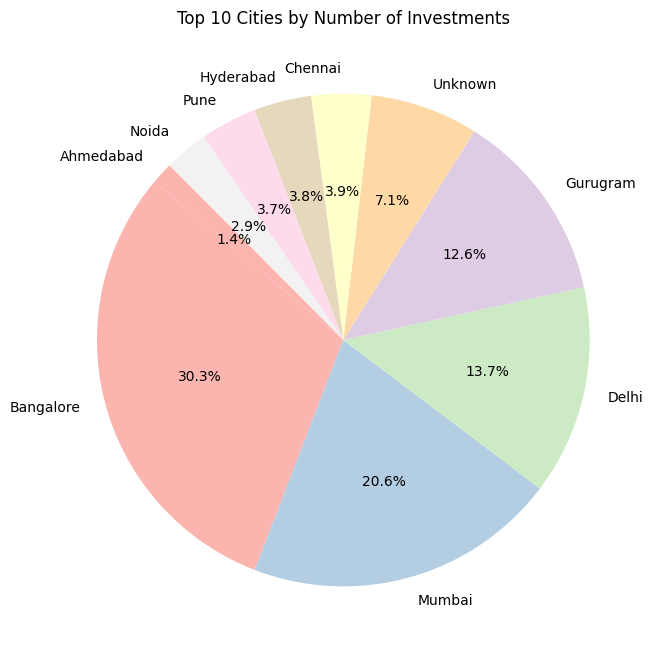

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is already loaded as df

top_cities = df['City__Location'].value_counts().head(10)

plt.figure(figsize=(8, 8))
top_cities.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Pastel1')
)
plt.title('Top 10 Cities by Number of Investments')
plt.ylabel('')  # Hides the default y-axis label
plt.show()

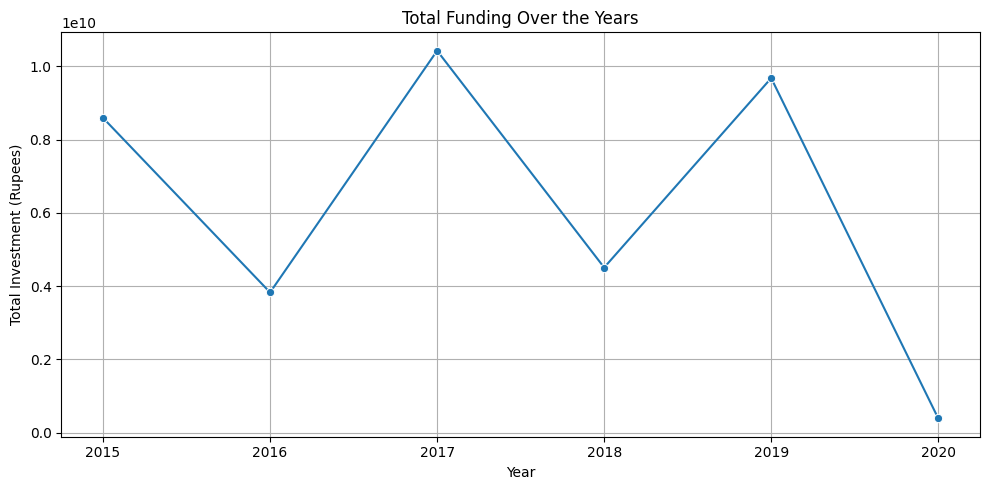

In [20]:
df['Year'] = df['Date_ddmmyyyy'].dt.year
yearly_trend = df.groupby('Year')['Amount_in_USD'].sum()

plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker='o')
plt.title('Total Funding Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Investment (Rupees)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
import plotly.express as px

industry_sum = df.groupby('Industry_Standardized')["Amount_in_USD"].sum().reset_index()
industry_sum = industry_sum.sort_values(by="Amount_in_USD", ascending=False).head(20)

fig = px.treemap(industry_sum, path=['Industry_Standardized'], values="Amount_in_USD",
                 title="Top 20 Industries by Total Investment",
                 color="Amount_in_USD", color_continuous_scale="Teal")
fig.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_19776\3524460741.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




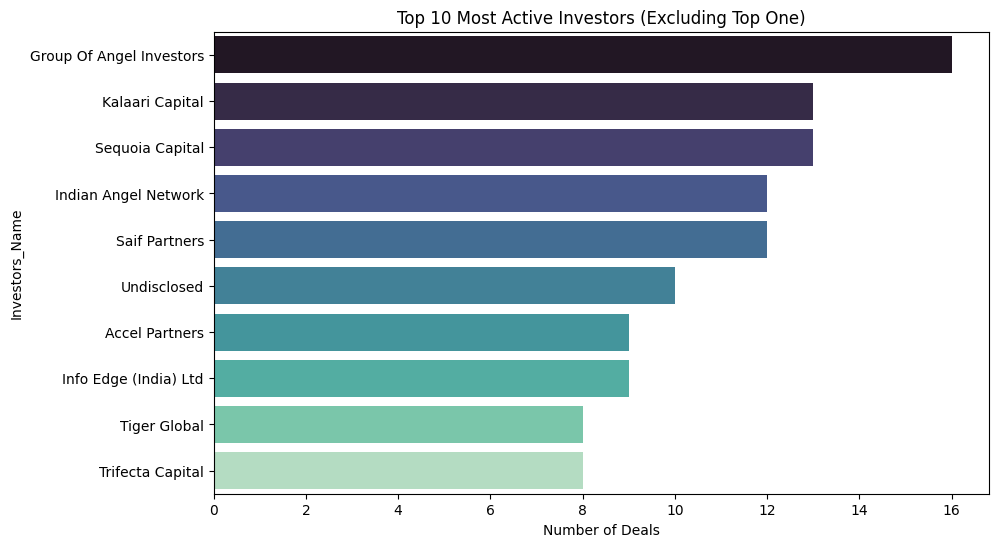

In [23]:
# Fix misspellings and unify names
df['Investors_Name'] = df['Investors_Name'].replace({
    'Undiclosed Investor': 'Undisclosed Investors',
    'Undisclosed Investor': 'Undisclosed Investors'
})

# Get top investors, then skip the first one
top_investors = df['Investors_Name'].value_counts().iloc[1:11]

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_investors.values, y=top_investors.index, palette='mako')
plt.title("Top 10 Most Active Investors (Excluding Top One)")
plt.xlabel("Number of Deals")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_19776\3543779602.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




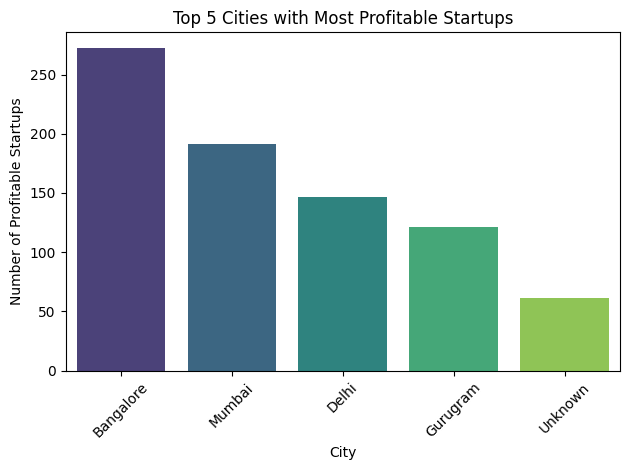

In [24]:
profitable_startups = df[df['Profitable'] == 1]

# Count profitable startups per city
top_profitable_cities = profitable_startups['City__Location'].value_counts().head(5)

# Plot with bars on x-axis (horizontal bar chart)
sns.barplot(x=top_profitable_cities.index, y=top_profitable_cities.values, palette='viridis')
plt.title("Top 5 Cities with Most Profitable Startups")
plt.xlabel("City")
plt.ylabel("Number of Profitable Startups")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

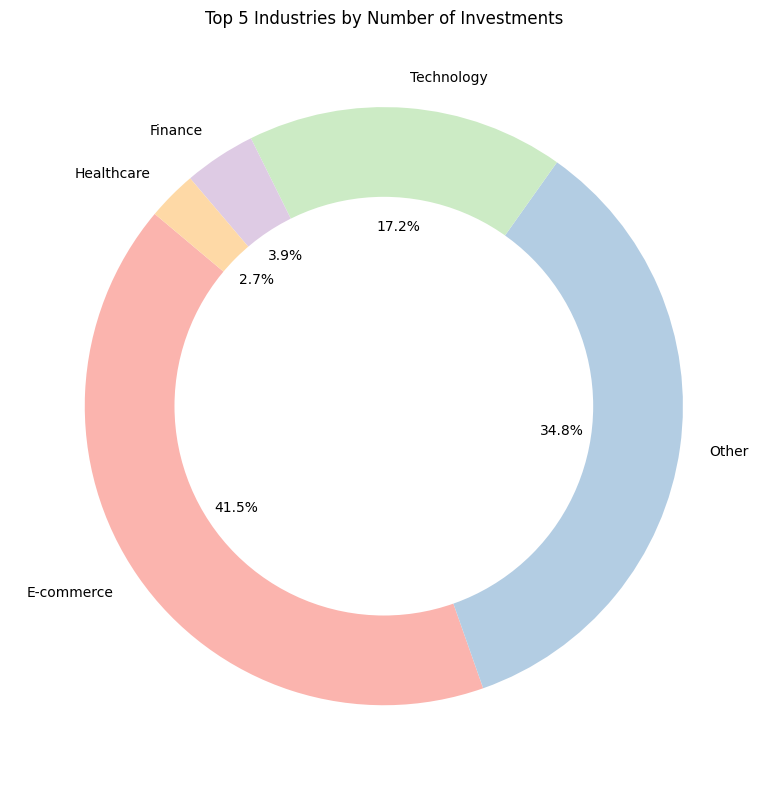

In [28]:
import matplotlib.pyplot as plt

# Prepare data
top_industries = df['Industry_Standardized'].value_counts().head(5)
industries = top_industries.index
counts = top_industries.values

# Donut chart
plt.figure(figsize=(8, 8))
colors = plt.cm.Pastel1.colors
wedges, texts, autotexts = plt.pie(counts, labels=industries, autopct='%1.1f%%',
                                   startangle=140, colors=colors, wedgeprops=dict(width=0.4))

# Add center circle to create donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title('Top 5 Industries by Number of Investments')
plt.tight_layout()
plt.show()
